# Computational Social Science Project #2 

**Enter your Name:** Gisselle, Vy, Peter, Melanie, Simon

*Semester:* Fall 2025


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 
diabetes.head(5)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [3]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [4]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
# print('data types:', diabetes.dtypes)

# more concise
for col, dtype in diabetes.dtypes.items():
    print(f"{col}: {dtype}")

County: object
State: object
CountyFIPS: object
Diabetes_Number: object
Obesity_Number: object
Physical_Inactivity_Number: object
sex and age_total population_65 years and over_sex ratio (males per 100 females): object
race_total population: int64
race_total population_one race: int64
race_total population_two or more races: int64
race_total population_one race_1: int64
race_total population_one race_white: int64
race_total population_one race_black or african american: int64
race_total population_one race_american indian and alaska native: int64
race_total population_one race_american indian and alaska native_cherokee tribal grouping: int64
race_total population_one race_american indian and alaska native_chippewa tribal grouping: int64
race_total population_one race_american indian and alaska native_navajo tribal grouping: int64
race_total population_one race_american indian and alaska native_sioux tribal grouping: int64
race_total population_one race_asian: int64
race_total populatio

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 

['Suppressed']


In [6]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 

['No Data']


In [7]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------
print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [8]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype("int32") 

# Obesity
# ----------
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype("int32") 


# Physical Inactivity
# ----------
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype("int32") 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype("str")

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [9]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)
diabetes.head(5)

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,0.093804,0.244366,0.226902,76.5,55200,0.981341,0.018659,...,0.717645,0.170344,0.145833,0.757808,0.363297,0.394511,92.1,0.145833,0.063188,0.082645
1,Baldwin County,Alabama,01003,0.080281,0.233255,0.192324,86.6,208107,0.982836,0.017164,...,0.747221,0.239353,0.195404,0.780512,0.375307,0.405205,92.6,0.195404,0.090675,0.104730
2,Barbour County,Alabama,01005,0.131875,0.310643,0.210651,76.2,25782,0.986308,0.013692,...,0.752230,0.219455,0.179738,0.789155,0.423668,0.365488,115.9,0.179738,0.077729,0.102009
3,Bibb County,Alabama,01007,0.105251,0.290052,0.258667,80.5,22527,0.991699,0.008301,...,0.748613,0.191903,0.162516,0.793182,0.425179,0.368003,115.5,0.162516,0.072491,0.090025
4,Blount County,Alabama,01009,0.108977,0.246804,0.249198,79.7,57645,0.983780,0.016220,...,0.732622,0.215110,0.177518,0.766363,0.374621,0.391743,95.6,0.177518,0.078758,0.098760


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [10]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
# with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
#display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

# printing only those out of 0,1 bound to be a bit more concise:
for col in diabetes.columns:
    if diabetes[col].dtype.kind in 'biufc':  # numeric columns
        max_val = diabetes[col].max()
        if max_val > 1:
            print(f"{col}, max: {max_val}")
        min_val = diabetes[col].min()
        if min_val < 0:
            rint(f"{col}, min: {min_val}")

race_total population, max: 10098052
total housing units, max: 2.0179738562091503
sex and age_total population_sex ratio (males per 100 females), max: 376.1
sex and age_total population_18 years and over_sex ratio (males per 100 females), max: 414.7


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [11]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['race_total population_one race_1',
 'sex and age_total population_65 years and over_1',
 'sex and age_total population_18 years and over_1',
 'sex and age_total population',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population']

In [12]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [13]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes.iloc[:, -5:]

,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female,Region
0,0.394511,92.1,0.063188,0.082645,Southeast
1,0.405205,92.6,0.090675,0.104730,Southeast
2,0.365488,115.9,0.077729,0.102009,Southeast
3,0.368003,115.5,0.072491,0.090025,Southeast
4,0.391743,95.6,0.078758,0.098760,Southeast
...,...,...,...,...,...
3215,0.351520,108.3,0.051273,0.055738,West
3216,0.390563,106.8,0.066178,0.069778,West
3217,0.352176,100.3,0.059877,0.061332,West
3218,0.374585,103.2,0.097675,0.109731,West


## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

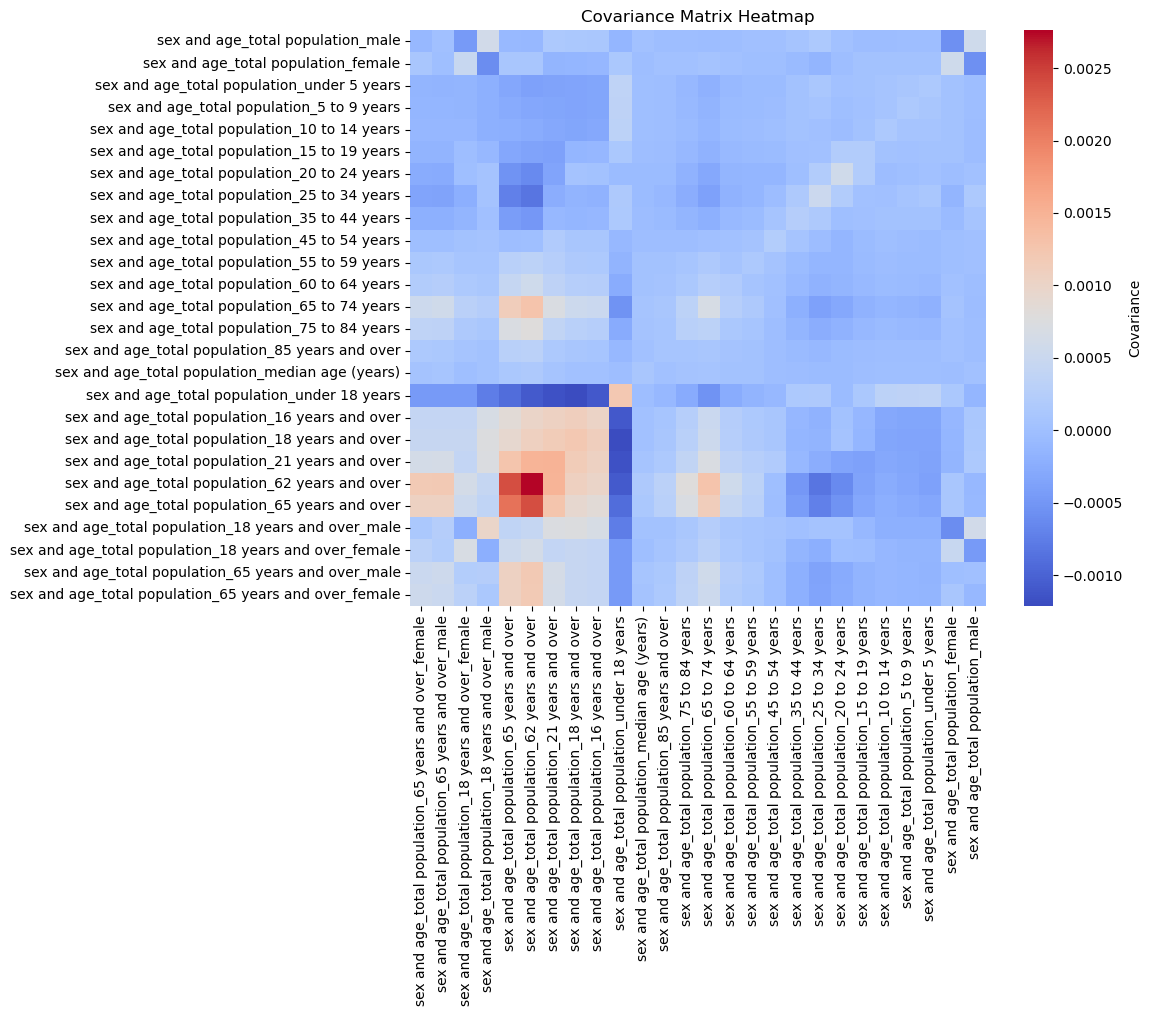

In [14]:
#
# EDA #1 and interpretations in this section 

# In this dataset, there are several age variables. One set of variables covers age ranges (under 5, 5-9, 10-14, ...), 
# while another set of variables covers cumulative age counts (16 + , 18 +, 21 +, etc.). Given the high covariance among these cumulative values,
# and with the age range variables, we plan to drop these cumulative variables. This will preserve details on age, while removing redundant features
#-----------

import matplotlib.pyplot as plt
import seaborn as sns
age_vars = diabetes.filter(regex=r'^sex and age_total population', axis=1)

# dropping rates
cols_to_drop = age_vars.filter(regex=r'per 100', axis=1).columns
age_vars = age_vars.drop(columns=cols_to_drop)

# dropping rates 

v_matrix = age_vars.cov()



#  heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(
    v_matrix,
    cmap='coolwarm',
    annot=False,         
    fmt='.2f',
    cbar_kws={'label': 'Covariance'},
    square=True
)
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.gca().invert_xaxis()

plt.show()


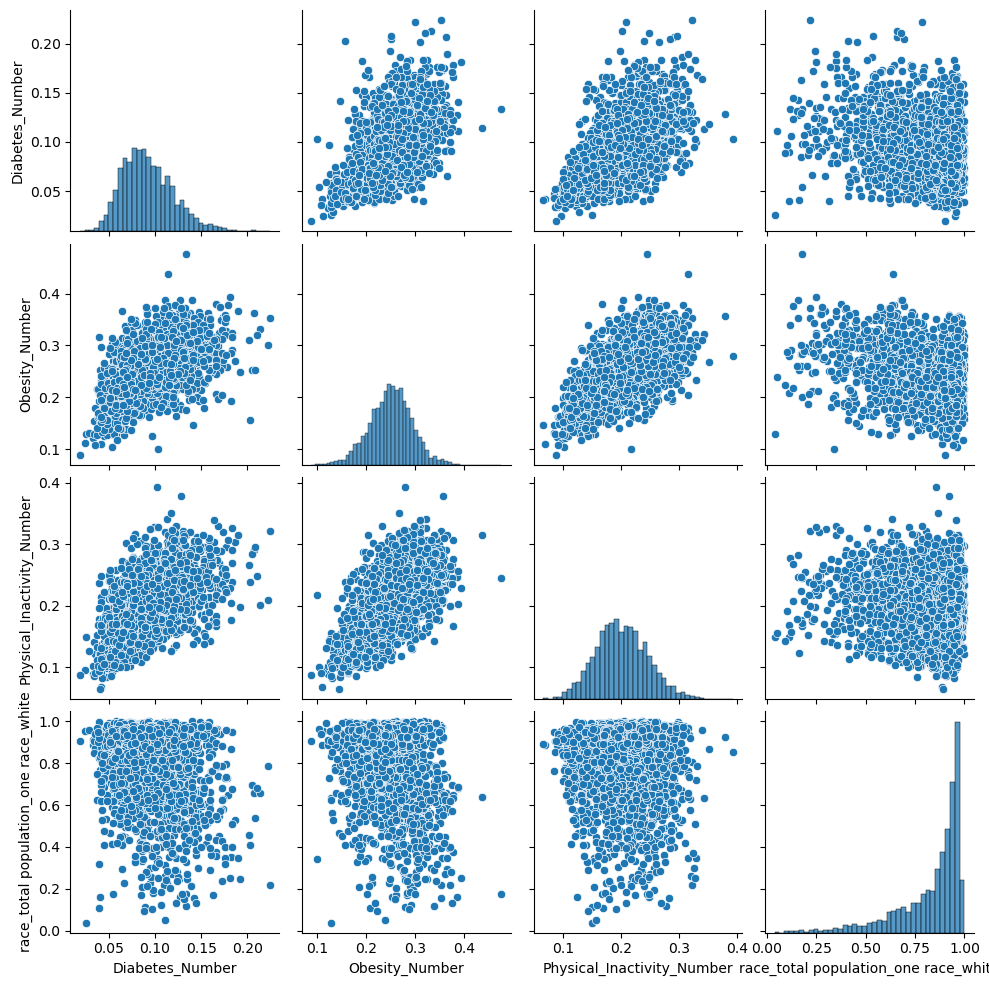

In [15]:
#
# EDA #2 and interpretations in this section 

# Diabetes number seems to be correlated with obesity number and inactivity level, but not with share of white people
# as expected, obesity, inactivity, and diabetes are all correlated with each other. Race doesn't seem to be correlated with any of these. 

#----

# pairplot with some features
sns.pairplot(diabetes[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number', 'race_total population_one race_white']])
plt.show()


In [16]:
# based on csv details, we are dropping parent categories for mutually exclusive subcategories AND 
# creating "other" subcategory where not mutually exclusive, and then dropping parents

# making "other categories to allow for mutually exclusive at most detailed level 

# for two or more races
two_or_more_children = [
    "race_total population_two or more races_white and black or african american",
    "race_total population_two or more races_white and american indian and alaska native",
    "race_total population_two or more races_white and asian",
    "race_total population_two or more races_black or african american and american indian and alaska native"
]
diabetes["race_total population_two or more races_other"] = (
    diabetes["race_total population_two or more races"] - sum(diabetes[c] for c in two_or_more_children)
)

# for american indian and alaska native 
ai_an_children = [
    "race_total population_one race_american indian and alaska native_cherokee tribal grouping",
    "race_total population_one race_american indian and alaska native_chippewa tribal grouping",
    "race_total population_one race_american indian and alaska native_navajo tribal grouping",
    "race_total population_one race_american indian and alaska native_sioux tribal grouping"
]
diabetes["race_total population_one race_american indian and alaska native_other"] = (
    diabetes["race_total population_one race_american indian and alaska native"] - sum(diabetes[c] for c in ai_an_children)
)


parent_vars_drop = [
    "race_total population_one race",
    "race_total population_one race_asian",
    "race_total population_one race_native hawaiian and other pacific islander",
    "hispanic or latino and race_total population_hispanic or latino (of any race)",
    "hispanic or latino and race_total population_not hispanic or latino",
    "citizen -  voting age population_citizen -  18 and over population",
    "sex and age_total population_under 18 years",
    "sex and age_total population_16 years and over",
    "sex and age_total population_18 years and over",
    "sex and age_total population_21 years and over",
    "sex and age_total population_62 years and over",
    "sex and age_total population_65 years and over",
    "race_total population_one race_american indian and alaska native",
    "race_total population_two or more races"
    
]



diabetes = diabetes.drop(labels=parent_vars_drop, axis=1)

# in mutually exclusive var groups (ie categories) dropping on <- decided against this, model will do it 
#category_to_drop = [
#    'race_total population_one race_white',  # one from race
#    'sex and age_total population_under 5 years',  # one age 
#    'hispanic or latino and race_total population_not hispanic or latino_white alone',  # one from (non)hispanic by race
#    'sex and age_total population_male' # one from sex only  
#    
#]
#


#diabetes = diabetes.drop(labels=category_to_drop, axis=1)


In [18]:
# check for mutually exclusive groups 
# drop one race variable, drop under 5 years old age range, hispanic or latino and race_total population_not hispanic or latino - white only

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [17]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ["Region"],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or more races,total housing units,citizen - voting age population_citizen - 18 and over population_male,citizen - voting age population_citizen - 18 and over population_female,sex and age_total population_male,sex and age_total population_female,sex and age_total population_sex ratio (males per 100 females),sex and age_total population_under 5 years,sex and age_total population_5

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [18]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(['Diabetes_Number','race alone or in combination with one or more other races_total population'],
                  axis = 1)

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

Dropping CountyFIPS because we don't want the identifiers of the county to be taken into account when training our model. Geographical data will still be used to train model with the region variable

In [19]:
#
# Feature selection
#-----------
X = X.drop(['CountyFIPS'],
                        axis = 1)
X.dtypes

Obesity_Number                                                                                                                                          float64
Physical_Inactivity_Number                                                                                                                              float64
sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                         object
race_total population                                                                                                                                     int64
race_total population_one race_white                                                                                                                    float64
race_total population_one race_black or african american                                                                                                float64
race_total population_one race_american 

In [20]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=.6,      # specify proportional split for training
                                                    test_size=.4,
                                                    random_state=10)       # specify proportional split for test

We're going to make temporary X and y which we will split again to get the three way split we want. Also we set random state so that we can get the same split when we run this notebook again.

In [21]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_test,
                                                             y_test,
                                                             train_size=0.5,
                                                             test_size=0.5,
                                                             random_state=10)

In [22]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very low penalty (e.g., an alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** # Peter, Simon, Vy should add these 

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  OLS

In [23]:
# OLS
# Model 1 training
#-----------

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_model = linear_reg.fit(X_train, y_train)

linear_reg_data = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_})
linear_reg_data         

,Feature,Coefficient
0,Obesity_Number,0.006387
1,Physical_Inactivity_Number,0.009875
2,sex and age_total population_65 years and over...,0.000468
3,race_total population,0.000200
4,race_total population_one race_white,-0.127933
5,race_total population_one race_black or africa...,0.090562
6,race_total population_one race_american indian...,0.028562
7,race_total population_one race_american indian...,0.008206
8,race_total population_one race_american indian...,0.043128
9,race_total population_one race_american indian...,0.060335


#### Model 2: Ridge 

In [24]:
# Ridge.
# Model 2 training

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model = ridge_reg.fit(X_train, y_train)

ridge_reg_data = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.named_steps['ridge'].coef_ })
ridge_reg_data

,Feature,Coefficient
0,Obesity_Number,0.006486
1,Physical_Inactivity_Number,0.009597
2,sex and age_total population_65 years and over...,0.004279
3,race_total population,0.000170
4,race_total population_one race_white,-0.004168
5,race_total population_one race_black or africa...,0.004019
6,race_total population_one race_american indian...,0.003741
7,race_total population_one race_american indian...,-0.000476
8,race_total population_one race_american indian...,0.003453
9,race_total population_one race_american indian...,0.005974


#### Model 3:  (Lasso) 

In [25]:
# Lasso 
# Model 3 training
#-----------

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.0001, max_iter=15000) 
lasso_model = lasso_reg.fit(X_train, 
                            y_train)          

lasso_reg_data = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_})
lasso_reg_data


,Feature,Coefficient
0,Obesity_Number,0.006352
1,Physical_Inactivity_Number,0.009844
2,sex and age_total population_65 years and over...,0.000121
3,race_total population,0.000000
4,race_total population_one race_white,-0.000000
5,race_total population_one race_black or africa...,0.000963
6,race_total population_one race_american indian...,0.002066
7,race_total population_one race_american indian...,-0.001035
8,race_total population_one race_american indian...,0.000691
9,race_total population_one race_american indian...,0.001971


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

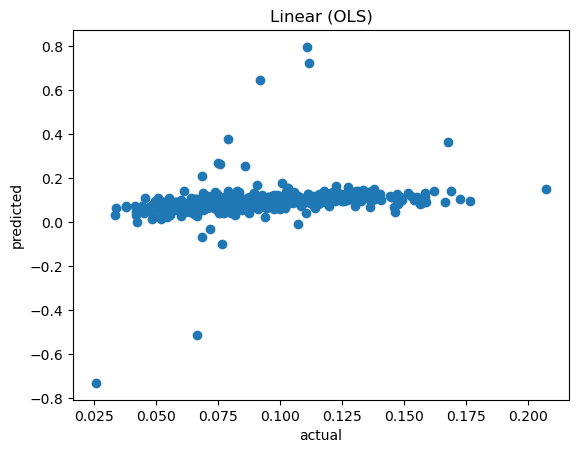

Linear RMSE = 0.004373520793703018


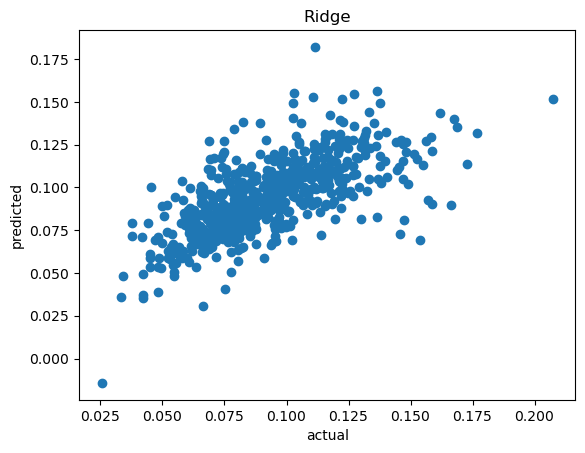

Ridge RMSE = 0.00041071087610574926


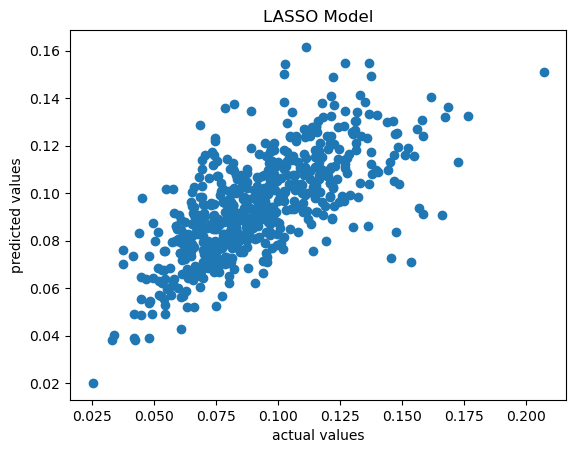

Lasso RMSE= 0.0003822038541554888


In [28]:
#
# Predict on validation data
#-----------
from sklearn.metrics import mean_squared_error

# OLS
linear_pred = linear_model.predict(X_validate)                         

plt.scatter(y_validate, linear_pred)                    
plt.title('Linear (OLS)') 
plt.xlabel('actual')                           
plt.ylabel('predicted')                       
plt.show()  

rmse_linear = mean_squared_error(linear_pred, y_validate)
print("Linear RMSE =", rmse_linear)


# Ridge
ridge_pred = ridge_model.predict(X_validate)  

plt.scatter(y_validate, ridge_pred)                 
plt.title('Ridge') 
plt.xlabel('actual')                          
plt.ylabel('predicted')                       
plt.show()    

rmse_ridge = mean_squared_error(ridge_pred, y_validate)
print("Ridge RMSE =", rmse_ridge)

# Lasso 
lasso_pred = lasso_model.predict(X_validate)

plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

rmse_lasso = mean_squared_error(lasso_pred, y_validate)
print("Lasso RMSE=", rmse_lasso)

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

> Our best model was Lasso, and removing unimportant features (close or perfect 0 coefficients) does not change the RMSE by much because Lasso already shrinks these values. There would only be a benefit if we wanted to simplify the model. 

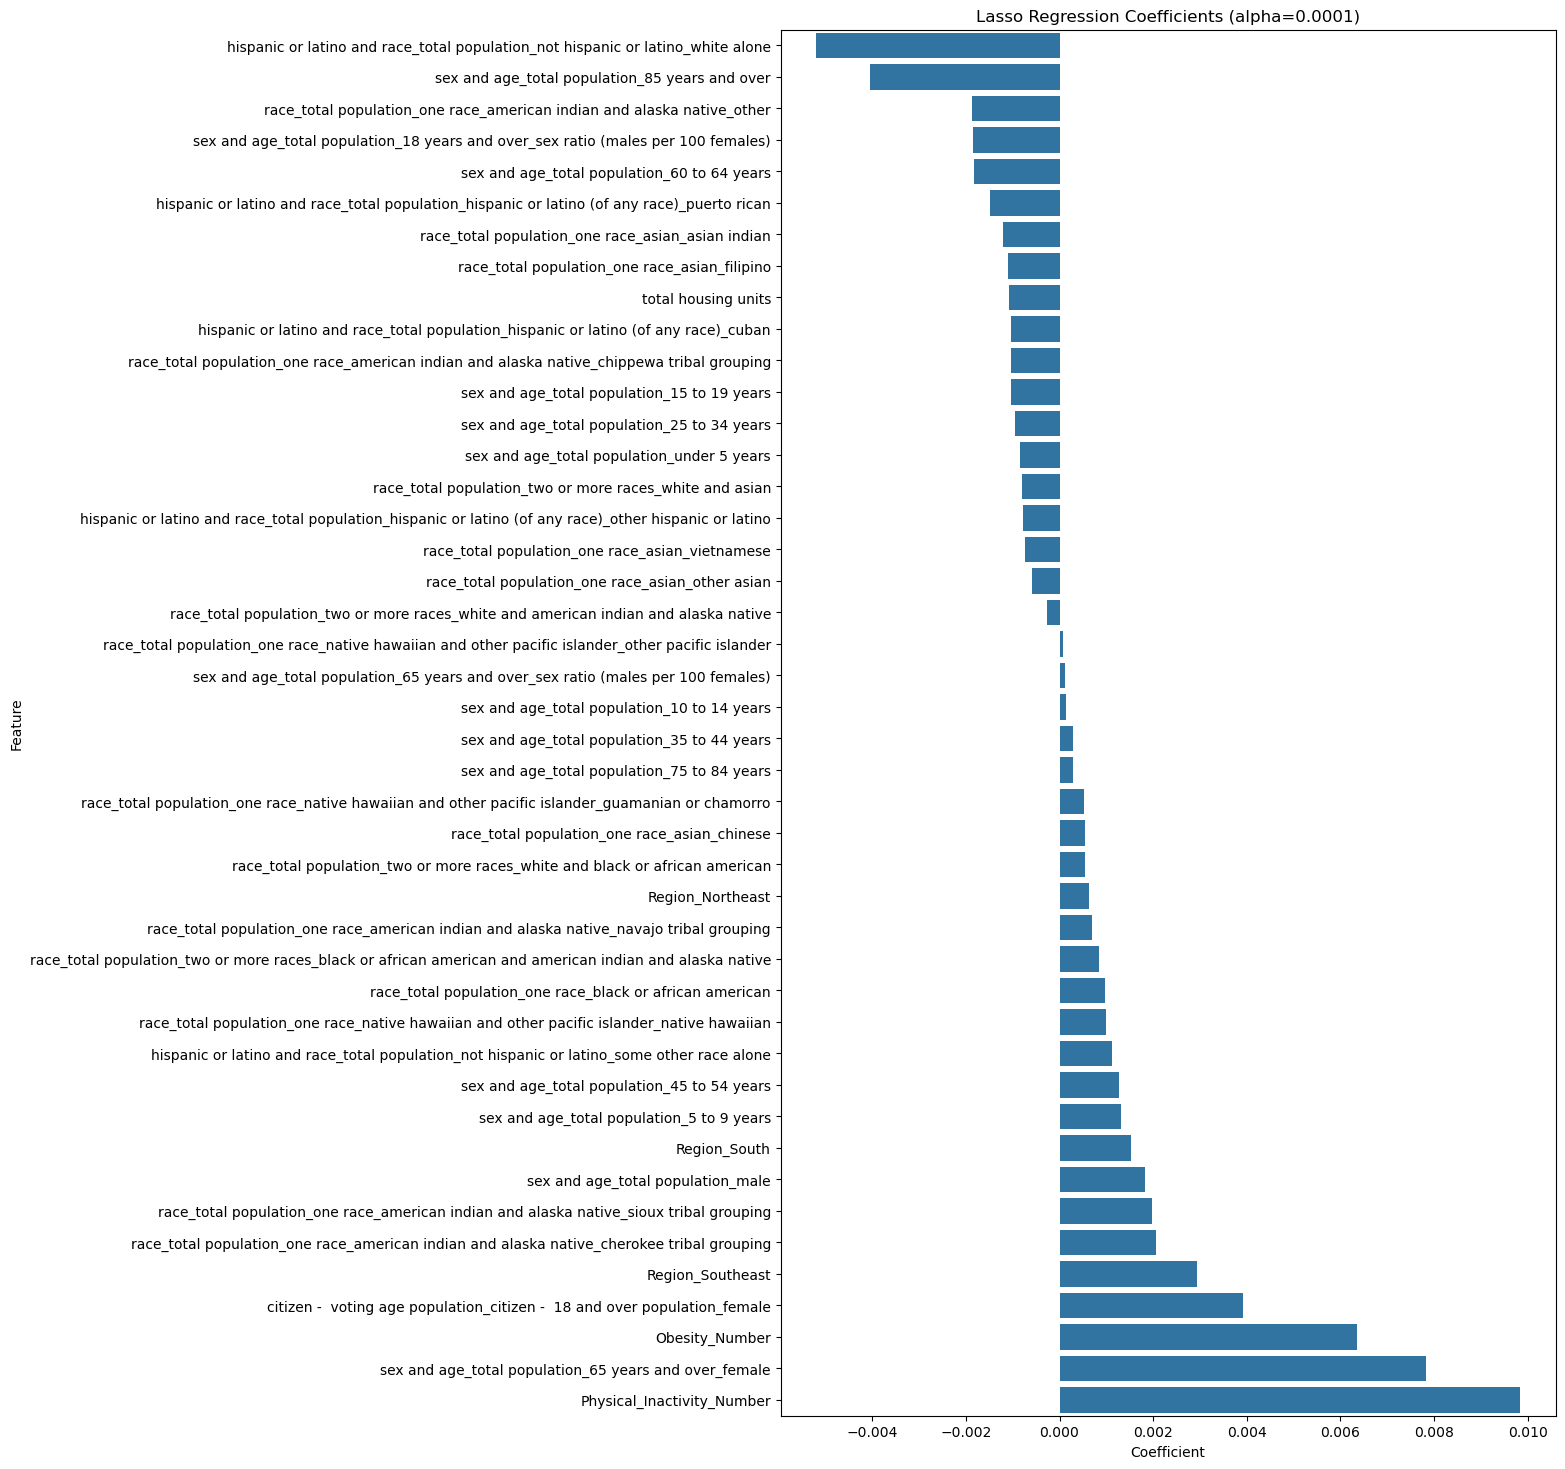

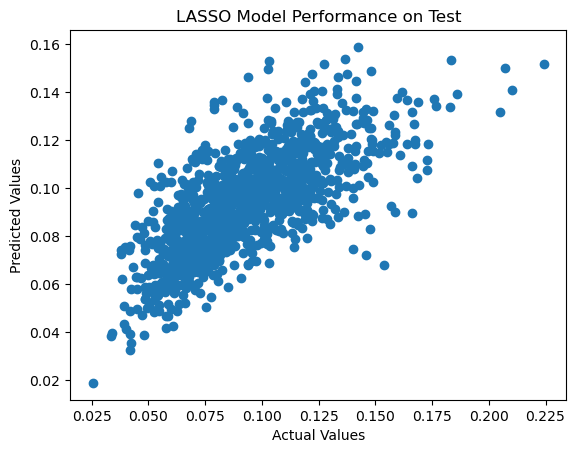

RMSE (original model):  0.0003922012507612418


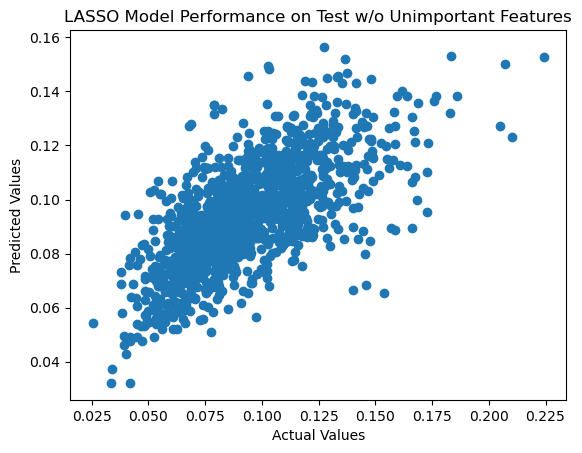

RMSE (updated model):  0.00041176622758861027
Change with post-validation drops (RMSE new - RMSE old):  1.956497682736847e-05


In [83]:
#
# Predict using your best model
#-----------

# Making a barplot that shows non-zero various coefficients
lasso_reg_data_nonzero = lasso_reg_data[lasso_reg_data['Coefficient'] != 0]

# sort by coefficient
lasso_reg_data_nonzero = lasso_reg_data_nonzero.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 18))
ax = sns.barplot(x="Coefficient", y="Feature", data=lasso_reg_data_nonzero)

ax.set_title("Lasso Regression Coefficients (alpha=0.0001)")
plt.show()


# moved this here to take out features that have been set to 0 

# if using 0:
#zero_coeffs = lasso_reg_data[lasso_reg_data['Coefficient'] == 0]

#cols_zero_coeff = zero_coeffs['Feature'].tolist()
#cols_zero_coeff

from sklearn.metrics import mean_squared_error

# threshold for dropping small coefficients, including zero coefficients
threshold =  2.1e-03
cols_to_remove = lasso_reg_data[lasso_reg_data['Coefficient'].abs() < threshold]['Feature'].tolist()

# drp columns from training data
X_train_update = X_train.drop(labels=cols_to_remove, axis=1)

#  new Lasso model on reduced feature set
lasso_reg = Lasso(alpha=0.0001, max_iter=15000) 
lasso_model_update = lasso_reg.fit(X_train_update, y_train)

# collect new coefficient data into DataFrame for inspection
lasso_reg_data_2 = pd.DataFrame({
    'Feature': X_train_update.columns,  
    'Coefficient': lasso_model_update.coef_
})

# drop same columns from test set
X_test_update = X_test.drop(labels=cols_to_remove, axis=1)

#  predictions and RMSE with updated model
lasso_pred2 = lasso_model_update.predict(X_test_update)
rmse_lasso2 = mean_squared_error(y_test, lasso_pred2) 

#  predictions and RMSE with previous model
lasso_pred1 = lasso_model.predict(X_test)
rmse_lasso1 = mean_squared_error(y_test, lasso_pred1)  

#  difference in RMSE (new - old)
diff = rmse_lasso2 - rmse_lasso1

#  original model predictions
plt.scatter(y_test, lasso_pred1)
plt.title('LASSO Model Performance on Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("RMSE (original model): ", rmse_lasso1)

#  updated model predictions
plt.scatter(y_test, lasso_pred2)
plt.title('LASSO Model Performance on Test w/o Unimportant Features')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

print("RMSE (updated model): ", rmse_lasso2)

print("Change with post-validation drops (RMSE new - RMSE old): ", diff)

### 5.3 Implement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [63]:
#
# Run cross-validation
#-----------





['race_total population_one race_some other race',
 'race alone or in combination with one or more other races_total population_black or african american',
 'race_total population_one race_asian_korean',
 'race_total population_one race_native hawaiian and other pacific islander_samoan',
 'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
 'race alone or in combination with one or more other races_total population_american indian and alaska native',
 'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
 'hispanic or latino and race_total population_not hispanic or latino_asian alone',
 'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
 'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
 'hispanic or latino and race_total population_not hisp

## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

**YOUR ANSWER HERE**...

2. Define overfitting, and why it matters for machine learning. How can we address it?

**YOUR ANSWER HERE**...

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

**YOUR ANSWER HERE**...